<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [33]:
import matplotlib.pyplot as plt
import numpy as np
np.random.normal(loc=5, scale=2, size=10)
#\mu, \sigma, n

array([5.40259517, 8.34798494, 1.44924839, 6.18303042, 4.80500058,
       2.72944548, 2.32882235, 5.77586078, 4.62040367, 6.05987664])

### 1.2 Visualising the random numbers

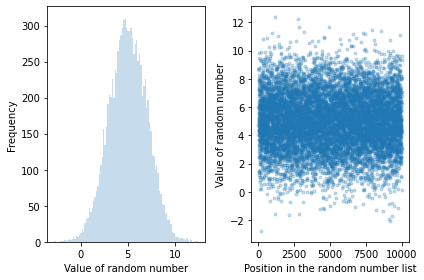

In [34]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, marker='.', alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.tight_layout()

### 1.3 68%?

In [35]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.15%


## 1 Brownian Motion in 1D

### 1.1 The scenario

Let’s take the probability of going right as p, and going left as q = 1-p

### 1.2 The simulation

In [36]:
import numpy.random as rnd
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

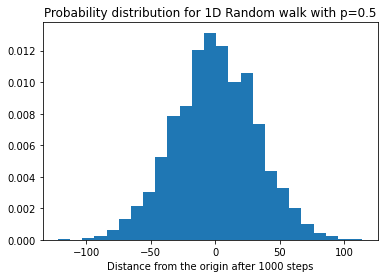

In [37]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

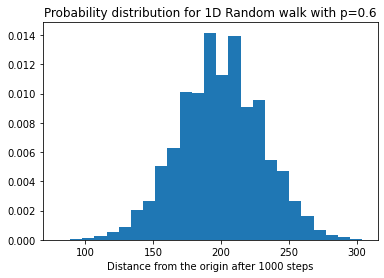

In [38]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

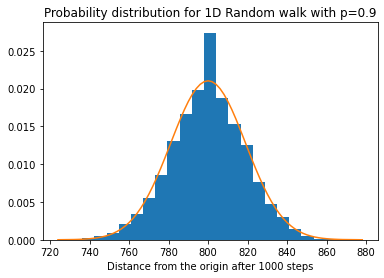

In [39]:
no_of_steps, p = 1_000, .9
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output
prob_right = p
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

$\frac{\textnormal{area of green region}}{\textnormal{area of square}} =
\frac{\pi(1)^2}{2\cdot 2} = \frac{1}{4} \pi \to \pi = 4 \left(\frac{\textnormal{area of green region}}{\textnormal{area of square}}\right) \
\textnormal{i.e. } \pi \approx 4 \left(\frac{N_{green}}{N_{total}}\right)$

### 2.2 A poor but intuitive solution

In [40]:
N_total = 100_000
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13984

### 2.3 A better solution

In [41]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.142072

### 2.4 A smarter solution

In [42]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.144512

## Exercise 1 :  Vital Stats of Random π

In [43]:
def estimate_pi(N_total=10_000):
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)

    return 4 * N_green / N_total                          # Estimate for pi

In [46]:
vals_pi = [[estimate_pi(10**a) for i in range(100)] for a in range(1,7)]

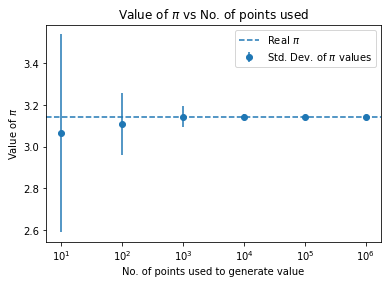

In [47]:
plt.axhline(y=np.pi,linestyle='dashed',label='Real $\pi$')
plt.title("Value of $\pi$ vs No. of points used")
plt.xlabel("No. of points used to generate value")
plt.ylabel("Value of $\pi$")
plt.errorbar([a for a in range(1,7)],np.mean(vals_pi,axis=1),yerr = np.std(vals_pi,axis=1),fmt='o', label='Std. Dev. of $\pi$ values')
plt.xticks(ticks=[a for a in range(1,7)], labels=[f'$10^{a}$' for a in range(1,7)])
plt.legend()
plt.show()